In [5]:
import sqlite3
import pandas as pd
import time
from IPython.core.display import clear_output

In [6]:
DB = "gpudata.db"

def run_query(q):
    with sqlite3.connect(DB) as conn:
        return pd.read_sql(q,conn)

def run_command(c):
    with sqlite3.connect(DB) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)
        
def run_inserts(c, values):
    with sqlite3.connect(DB) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c, values) 
        
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

In [13]:
#Create the chipsets table
c0 = """
CREATE TABLE chipsets(
    chipset_id INTEGER PRIMARY KEY AUTOINCREMENT,
    chipset_name TEXT
); 
"""

run_command(c0)

In [15]:
#Create the card_specs table
c1 = """
CREATE TABLE card_specs(
    card_id TEXT PRIMARY KEY,
    card_name TEXT,
    series TEXT,
    chipset_id INTEGER,
    memory_in_GB FLOAT,
    core_clock_in_GHz FLOAT,
    ratings INTEGER,
    manufacturer TEXT,
    part_number TEXT,
    interface TEXT,
    memory_type TEXT,
    tdp_in_watts INTEGER,
    fan TEXT,
    sli_support TEXT,
    crossfire_support TEXT,
    hdmi INTEGER DEFAULT 0,
    FOREIGN KEY(chipset_id) REFERENCES chipsets(chipset_id)
); 
"""

run_command(c1)

In [16]:
#Create the card_prices table
c2 = """
CREATE TABLE card_prices(
    card_id TEXT,
    merchant_id INTEGER,    
    datetime FLOAT,
    price FLOAT,
    PRIMARY KEY(card_id, merchant_id, datetime)
    FOREIGN KEY(card_id) REFERENCES card_specs(card_id)
    FOREIGN KEY(merchant_id) REFERENCES merchants(merchant_id)
); 
"""

run_command(c2)

In [17]:
#Create the merchants table
c3 = """
CREATE TABLE merchants(
    merchant_id INTEGER PRIMARY KEY AUTOINCREMENT,
    merchant_name TEXT
); 
"""

run_command(c3)

In [18]:
#Create the benchmarks table
c4 = """
CREATE TABLE benchmarks(
    chipset_id INTEGER PRIMARY KEY,
    passmark_g3d INTEGER,
    passmark_direct_compute INTEGER,
    FOREIGN KEY(chipset_id) REFERENCES chipsets(chipset_id)
); 
"""

run_command(c4)

In [19]:
show_tables()

,name,type
0,sqlite_sequence,table
1,chipsets,table
2,card_specs,table
3,card_prices,table
4,merchants,table
5,benchmarks,table


In [12]:
#Uncomment the lines to remove the table(s).
#run_command('''DROP table chipsets''')
#run_command('''DROP TABLE card_specs;''')
#run_command('''DROP TABLE card_prices;''')
#run_command('''DROP TABLE merchants;''')
#run_command('''DROP TABLE benchmarks;''')

In [38]:
q0 = 'SELECT * FROM chipsets'
chipsets = run_query(q0)
print(len(chipsets))
chipsets

146


,chipset_id,chipset_name
0,1,GeForce GTX 1080 Ti
1,2,GeForce GTX 1060 6GB
2,3,GeForce GTX 1070
3,4,GeForce GTX 1050 Ti
4,5,GeForce GTX 1070 Ti
5,6,GeForce GTX 1060 3GB
6,7,GeForce GTX 1080
7,8,GeForce GTX 1050
8,9,Radeon RX 560 - 1024
9,10,Radeon RX 580


In [31]:
chipsets['chipset_name'].values

array(['GeForce GTX 1080 Ti', 'GeForce GTX 1060 6GB', 'GeForce GTX 1070',
       'GeForce GTX 1050 Ti', 'GeForce GTX 1070 Ti',
       'GeForce GTX 1060 3GB', 'GeForce GTX 1080', 'GeForce GTX 1050',
       'Radeon RX 560 - 1024', 'Radeon RX 580', 'GeForce GT 1030',
       'Quadro GP100', 'Titan Xp', 'Radeon RX VEGA 64', 'Titan V',
       'Radeon RX 570', 'GeForce GT 710', 'Radeon HD 6450',
       'Quadro P6000', 'Radeon RX VEGA 56', 'Radeon RX 550 - 512',
       'GeForce GTX 970', 'GeForce GTX 750 Ti', 'Quadro P4000',
       'Radeon HD 4350', 'Radeon RX 560 - 896', 'Radeon RX 550 - 640',
       'Vega Frontier Edition', 'Quadro P2000', 'Radeon Pro WX 9100',
       'GeForce GTX 980 Ti', 'GeForce GT 730', 'Radeon Pro WX 4100',
       'Radeon R9 390', 'Radeon Pro Duo Polaris', 'Quadro P600',
       'Radeon R7 240', 'Radeon Pro WX 5100', 'GeForce GTX 960',
       'FirePro W9100', 'Radeon R9 380', 'Quadro P5000', 'Radeon RX 460',
       'Quadro P1000', 'GeForce 8400 GS', 'GeForce GT 430',
   

In [39]:
q1 = 'SELECT * FROM card_specs'
specs = run_query(q1)
print(len(specs))
#specs.dropna()
specs


499


,card_id,card_name,series,chipset_id,memory_in_GB,core_clock_in_GHz,ratings,manufacturer,part_number,interface,memory_type,tdp_in_watts,fan,sli_support,crossfire_support,hdmi
0,Z8cMnQ,Asus STRIX-GTX1080TI-O11G-GAMING,STRIX GAMING OC,1,11.000,1.570,45,None,None,None,None,NaN,None,None,None,0
1,7RKhP6,Gigabyte GV-N1060WF2OC-6GD,WINDFORCE OC 6G,2,6.000,1.580,38,None,None,None,None,NaN,None,None,None,0
2,bpBrxr,NVIDIA 9001G4112520001,,3,8.000,1.510,17,None,None,None,None,NaN,None,None,None,0
3,ttQRsY,MSI GTX 1050 Ti 4G OC,,4,4.000,1.340,9,None,None,None,None,NaN,None,None,None,0
4,ZWnG3C,MSI GTX 1070 TI GAMING 8G,,5,8.000,1.610,2,None,None,None,None,NaN,None,None,None,0
5,pbL7YJ,EVGA 06G-P4-6161-KR,GAMING,2,6.000,1.510,13,None,None,None,None,NaN,None,None,None,0
6,Ft7CmG,Zotac ZT-P10600A-10L,Mini,2,6.000,1.510,23,None,None,None,None,NaN,None,None,None,0
7,7bL7YJ,Gigabyte GV-N1060WF2OC-3GD,Windforce OC,6,3.000,1.560,22,None,None,None,None,NaN,None,None,None,0
8,v34NnQ,Asus ROG STRIX-GTX1080-A8G-GAMING,ROG STRIX,7,8.000,1.670,54,None,None,None,None,NaN,None,None,None,0
9,NndFf7,Zotac ZT-P10510A-10L,Mini,4,4.000,1.300,21,None,None,None,None,NaN,None,None,None,0


In [40]:
q2 = 'SELECT * FROM card_prices'
prices = run_query(q2)
print(len(prices))
prices.head()


4768


,card_id,merchant_id,datetime,price
0,24X2FT,1,1.505256e+09,183.53
1,24X2FT,1,1.509554e+09,161.69
2,24X2FT,1,1.509658e+09,159.85
3,24X2FT,1,1.510179e+09,170.04
4,24X2FT,1,1.510354e+09,159.85


In [33]:
prices['datetime'] = prices['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
prices.head()

,card_id,merchant_id,datetime,price
0,24X2FT,1,2017-09-12,183.53
1,24X2FT,1,2017-11-01,161.69
2,24X2FT,1,2017-11-02,159.85
3,24X2FT,1,2017-11-08,170.04
4,24X2FT,1,2017-11-10,159.85


In [41]:
q3 = 'SELECT * FROM merchants'
merchants = run_query(q3)
merchants

,merchant_id,merchant_name
0,1,Newegg Marketplace
1,2,Newegg Business
2,3,Newegg
3,4,B&H
4,5,PCM
5,6,Walmart
6,7,SuperBiiz
7,8,Dell
8,9,OutletPC
9,10,Monoprice


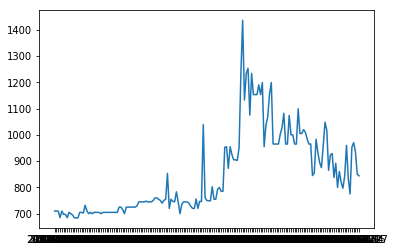

In [35]:
q_test = '''
SELECT 
    s.chipset_id,
    c.chipset_name,
    p.datetime,
    p.price
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
'''

test_table = run_query(q_test)
test_table['datetime'] = test_table['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
ten_eigties = test_table[test_table['chipset_name'] == 'GeForce GTX 1080 Ti']
grouped = ten_eigties.groupby(['datetime'])['price'].mean()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(grouped.index, grouped.values)

In [37]:
q_test = '''
SELECT 
    s.chipset_id,
    c.chipset_name,
    p.datetime,
    p.price
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
'''

test_table = run_query(q_test)
test_table['datetime'] = test_table['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
result = test_table[test_table['chipset_name'] == 'Titan Xp']

print(result)

Empty DataFrame
Columns: [chipset_id, chipset_name, datetime, price]
Index: []


In [73]:
q3 = 'SELECT c.chipset_id, c.chipset_name, b.passmark_g3d, b.passmark_direct_compute FROM benchmarks b INNER JOIN chipsets c ON c.chipset_id = b.chipset_id'
benchmarks = run_query(q3)
benchmarks.sort_values('passmark_g3d', ascending=False)

,chipset_id,chipset_name,passmark_g3d,passmark_direct_compute
12,13,Titan Xp,14305,9302
14,15,Titan V,14166,8801
0,1,GeForce GTX 1080 Ti,14032,9417
18,19,Quadro P6000,13556,8501
6,7,GeForce GTX 1080,12287,7966
4,5,GeForce GTX 1070 Ti,12225,7430
11,12,Quadro GP100,11871,7109
13,14,Radeon RX VEGA 64,11631,7017
26,28,Vega Frontier Edition,11457,6921
29,31,GeForce GTX 980 Ti,11342,6403


In [44]:
chipsets_query = '''
SELECT 
    s.chipset_id,
    c.chipset_name
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
'''
chipsets_with_price = run_query(chipsets_query).drop_duplicates()
chipsets_with_price

,chipset_id,chipset_name
0,52,Radeon Pro WX 3100
87,126,Quadro M2000
234,17,GeForce GT 710
478,1,GeForce GTX 1080 Ti
808,82,Quadro K6000
837,32,GeForce GT 730
886,50,Radeon R9 270X
889,18,Radeon HD 6450
1187,16,Radeon RX 570
1455,20,Radeon RX VEGA 56


In [69]:
prices_query = '''
SELECT 
    s.chipset_id,
    c.chipset_name,
    p.datetime,
	p.merchant_id,
	m.merchant_name,
    p.price
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
INNER JOIN merchants m ON p.merchant_id = m.merchant_id
'''
prices = run_query(prices_query)
prices['datetime'] = prices['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 

In [70]:
prices

,chipset_id,chipset_name,datetime,merchant_id,merchant_name,price
0,52,Radeon Pro WX 3100,2017-09-12,1,Newegg Marketplace,183.53
1,52,Radeon Pro WX 3100,2017-11-01,1,Newegg Marketplace,161.69
2,52,Radeon Pro WX 3100,2017-11-02,1,Newegg Marketplace,159.85
3,52,Radeon Pro WX 3100,2017-11-08,1,Newegg Marketplace,170.04
4,52,Radeon Pro WX 3100,2017-11-10,1,Newegg Marketplace,159.85
5,52,Radeon Pro WX 3100,2017-11-12,1,Newegg Marketplace,159.10
6,52,Radeon Pro WX 3100,2017-12-05,1,Newegg Marketplace,152.99
7,52,Radeon Pro WX 3100,2017-12-13,1,Newegg Marketplace,160.11
8,52,Radeon Pro WX 3100,2017-12-14,1,Newegg Marketplace,160.11
9,52,Radeon Pro WX 3100,2017-12-15,1,Newegg Marketplace,160.11


In [56]:
prices['merchant_id'].isin([1,2])

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
4738    False
4739    False
4740    False
4741    False
4742    False
4743    False
4744    False
4745    False
4746    False
4747    False
4748    False
4749    False
4750    False
4751    False
4752    False
4753    False
4754    False
4755    False
4756    False
4757    False
4758    False
4759    False
4760    False
4761    False
4762    False
4763    False
4764    False
4765    False
4766    False
4767    False
Name: merchant_id, Length: 4768, dtype: bool

In [2]:
test = {'a': 1, 'b': 2}
data = [trace for key, trace in test.items()]

In [14]:
memory_query = '''
SELECT
    s.chipset_id,
    c.chipset_name,
    s.memory_in_GB
FROM card_specs s
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id

'''
memory = run_query(memory_query)


In [17]:
input1_values = [2, 4]

for input_val in input1_values:
    df_filtered = memory[memory['chipset_id'] == input_val]
    name_2 = df_filtered['chipset_name'].values[0]
    data_2 = df_filtered['memory_in_GB']		   
    print(name_2)
    print(data_2)

1      GeForce GTX 1060 6GB
5      GeForce GTX 1060 6GB
6      GeForce GTX 1060 6GB
13     GeForce GTX 1060 6GB
15     GeForce GTX 1060 6GB
16     GeForce GTX 1060 6GB
24     GeForce GTX 1060 6GB
27     GeForce GTX 1060 6GB
47     GeForce GTX 1060 6GB
59     GeForce GTX 1060 6GB
68     GeForce GTX 1060 6GB
87     GeForce GTX 1060 6GB
90     GeForce GTX 1060 6GB
114    GeForce GTX 1060 6GB
124    GeForce GTX 1060 6GB
128    GeForce GTX 1060 6GB
131    GeForce GTX 1060 6GB
134    GeForce GTX 1060 6GB
138    GeForce GTX 1060 6GB
139    GeForce GTX 1060 6GB
154    GeForce GTX 1060 6GB
155    GeForce GTX 1060 6GB
158    GeForce GTX 1060 6GB
167    GeForce GTX 1060 6GB
168    GeForce GTX 1060 6GB
187    GeForce GTX 1060 6GB
204    GeForce GTX 1060 6GB
235    GeForce GTX 1060 6GB
263    GeForce GTX 1060 6GB
287    GeForce GTX 1060 6GB
289    GeForce GTX 1060 6GB
328    GeForce GTX 1060 6GB
341    GeForce GTX 1060 6GB
345    GeForce GTX 1060 6GB
365    GeForce GTX 1060 6GB
436    GeForce GTX 1

In [19]:
benchmarks_query = '''
SELECT
    c.chipset_id,
    c.chipset_name,
    b.passmark_g3d,
    b.passmark_direct_compute
FROM chipsets c
INNER JOIN benchmarks b ON b.chipset_id = c.chipset_id

'''
benchmarks = run_query(benchmarks_query)

In [22]:
df_filtered = benchmarks[benchmarks['chipset_id'] == 1]

In [28]:
x = df_filtered['chipset_name'].values

x

array(['GeForce GTX 1080 Ti'], dtype=object)

In [27]:
y = df_filtered['passmark_direct_compute'].values[0]
y

9417

In [29]:
benchmarks

,chipset_id,chipset_name,passmark_g3d,passmark_direct_compute
0,1,GeForce GTX 1080 Ti,14032,9417
1,2,GeForce GTX 1060 6GB,9606,5068
2,3,GeForce GTX 1070,11164,6624
3,4,GeForce GTX 1050 Ti,5914,3249
4,5,GeForce GTX 1070 Ti,12225,7430
5,6,GeForce GTX 1060 3GB,8908,4679
6,7,GeForce GTX 1080,12287,7966
7,8,GeForce GTX 1050,4565,2808
8,9,Radeon RX 560 - 1024,4465,2455
9,10,Radeon RX 580,8376,4288
